#### IMPORT LIBRARIES

In [50]:
from pandas import read_csv
import pandas as pd
from datetime import datetime
from matplotlib import pyplot

---

#### IMPORT DATASET with FUNCTION

In [51]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo_sales.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True, date_parser = parser)

In [114]:
print(series.dtypes)
print(series.shape)
print(series.head())

float64
(36,)
Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


#### IMPORTING DATA WITHOUT FUNCTION

In [23]:
series_man = pd.read_csv("shampoo_sales.csv", header = 0, parse_dates = [0], index_col = 0, squeeze = True)
print(series_man.head())

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64


---

#### WAYS TO CHECK SEASONALITY & TREND

1. PLOT: As we can clearly see from plot there is a UNEVEN SEASONALITY as well as an UPWARD TREND in our Dataset.

2. ADFULLER TEST: Below we will perform a ADFULLER TEST to check if our data has STATIONARITY.

3. DECOMPOSITION PLOT: With help of Decomposition Plot we can see OBSERVED, TREND, SEASONALITY & RESIDUAL Trend in separate plots.

#### 1. CREATE INITIAL PLOT

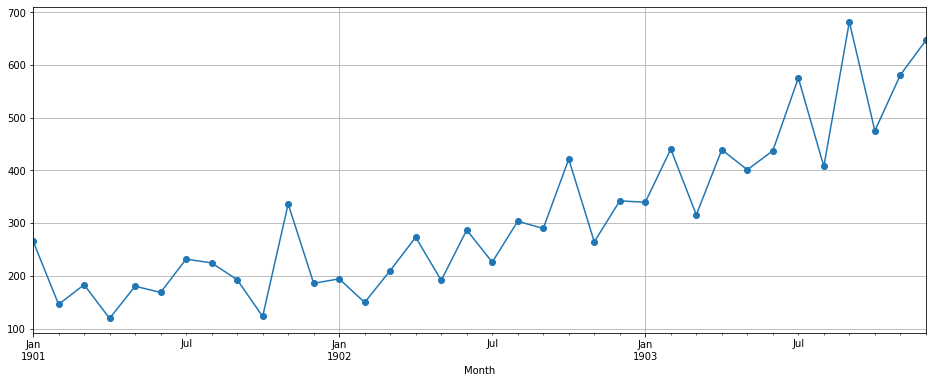

In [190]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,6)
# WHOLE DATASET
series.plot(grid = True, marker = 'o')
plt.show()

#### 2. PERFORM ADFULLER TEST - (To check Time-Series has STATIONARITY) 

In [54]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(series, autolag = 'AIC')

print("1. ADF: ", dftest[0])
print("2. P-Value: ", dftest[1])
print("3. Num. of Lags: ", dftest[2])
print("4. Num. of Observations used for ADF Regression and Critical Values Calculations: ", dftest[3])
print("5. Critical Values: ", dftest[4])
if dftest[1] > 0.05:
    print('TIME-SERIES is NOT STATIONARY')
else:
    print('TIME-SERIES is STATIONARY')

1. ADF:  3.0601420836411815
2. P-Value:  1.0
3. Num. of Lags:  10
4. Num. of Observations used for ADF Regression and Critical Values Calculations:  25
5. Critical Values:  {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}
TIME-SERIES is NOT STATIONARY


#### 3. CREATE DECOMPOSITION PLOT - To check TREND, SEASONALITY & RESIDUALS(White-Noise)

##### ONLY TREND PLOT

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

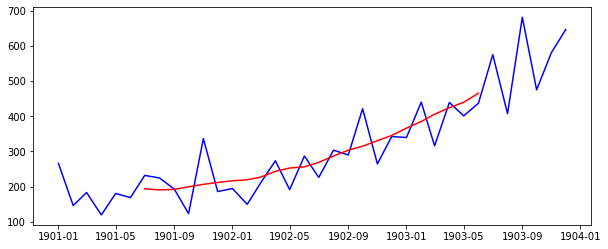

In [115]:
plt.plot(series.index, series, c = 'blue')
plt.plot(decomposition.trend.index, decomposition.trend, c = 'red')

##### ONLY SEASONAL PLOT

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

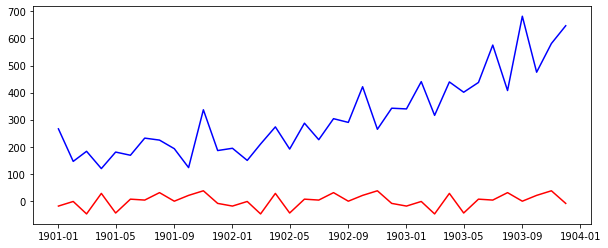

In [116]:
plt.plot(series.index, series, c = 'blue')
plt.plot(decomposition.seasonal.index, decomposition.seasonal, c = 'red')

##### ONLY RESIDUAL PLOT

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

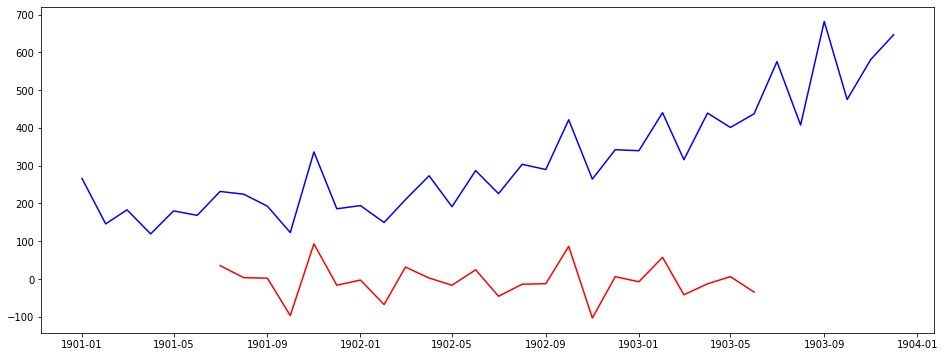

In [57]:
plt.plot(series.index, series, c = 'blue')
plt.plot(decomposition.resid.index, decomposition.resid, c = 'red')

##### ONLY OBSERVED PLOT

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

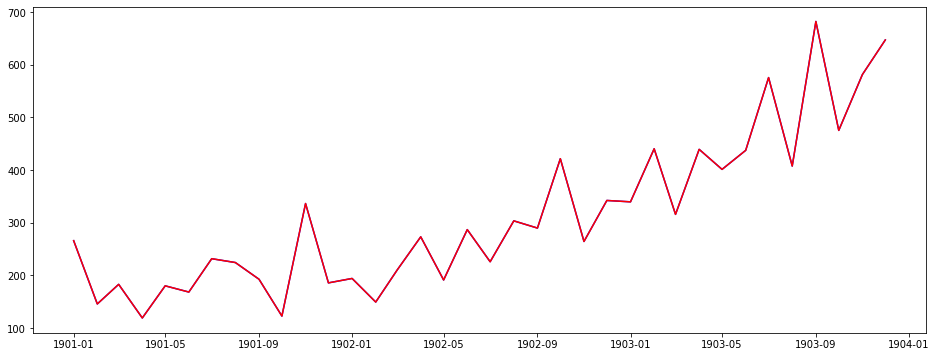

In [58]:
plt.plot(series.index, series, c = 'blue')
plt.plot(decomposition.observed.index, decomposition.observed, c = 'red')

##### DECOMPOSITION PLOT - w/ ADDITIVE MODEL

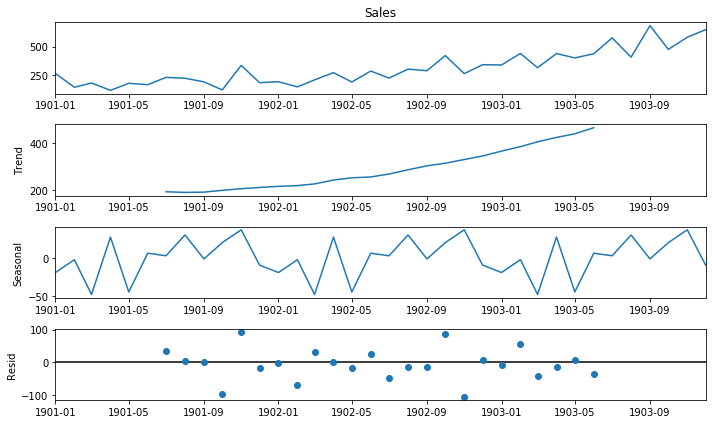

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(series, model = 'additive', period = 12)
decomposition.plot()
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

From the TREND PLOT we can make it out, there is some proportion of TREND in our Dataset.
The same goes for SEASONALITY.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

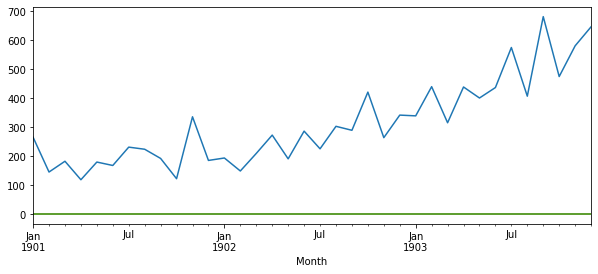

In [106]:
plt.rcParams["figure.figsize"] = (10,4)
result.trend.plot()
plt.show()

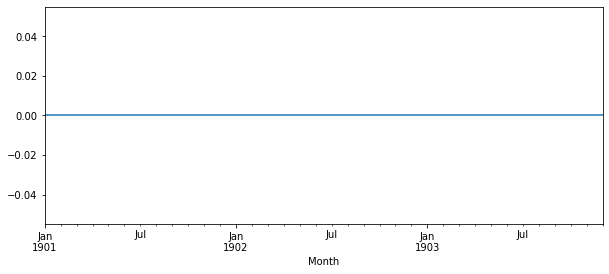

In [107]:
result.seasonal.plot()

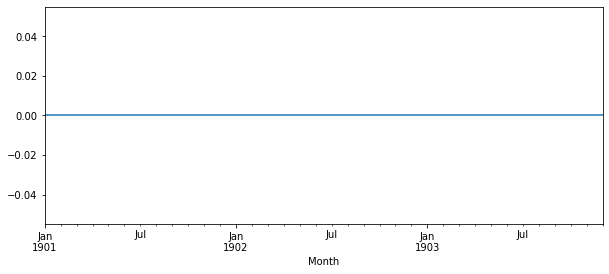

In [108]:
result.resid.plot()

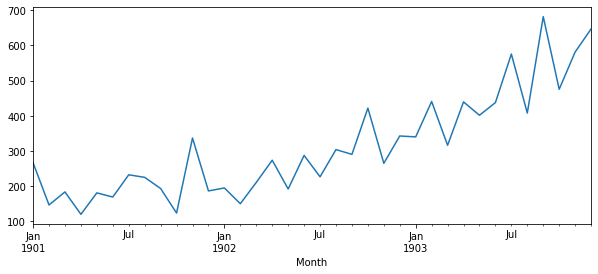

In [109]:
result.observed.plot()

---

## MANUAL DIFFERENCING

#### CREATE FIRST DIFFERENCE FOR TREND - (df.diff(periods = 1))

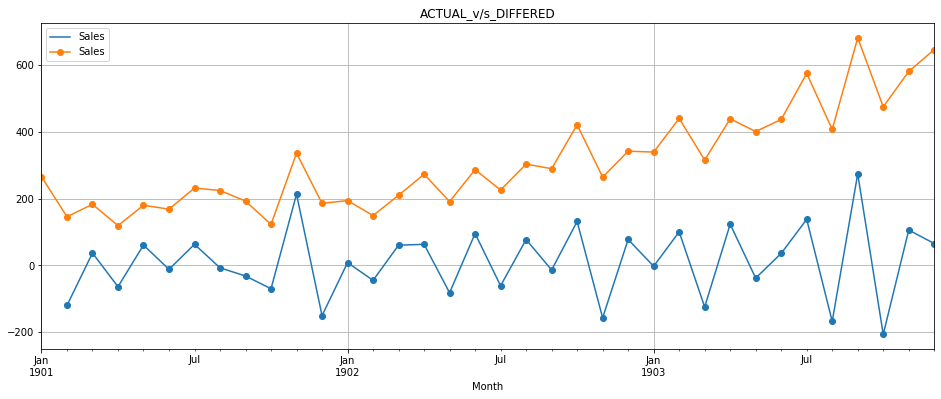

In [201]:
difr_1 = series.diff(periods = 1)
plt.title('ACTUAL_v/s_DIFFERED')
#plt.legend()
plt.grid('True')
difr_1.plot(legend = True, marker = 'o')
series.plot(grid = True, legend = True, marker = 'o')
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

#plt.plot(difr_1)
#plt.plot(series)

---

#### DROP NaN VALUES

Decomposition Plot does not except NaN values, so we need to drop NaN Values before creating a Decomposition Plot.

In [164]:
difr_1_NoNA = difr_1.dropna()

---

#### CHECK DECOMPOSITION PLOT w/ DIFFERENCE

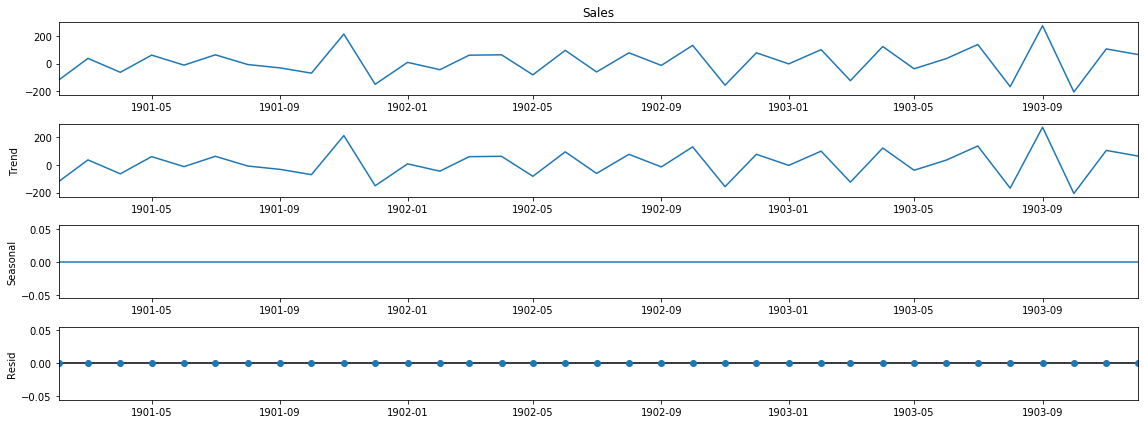

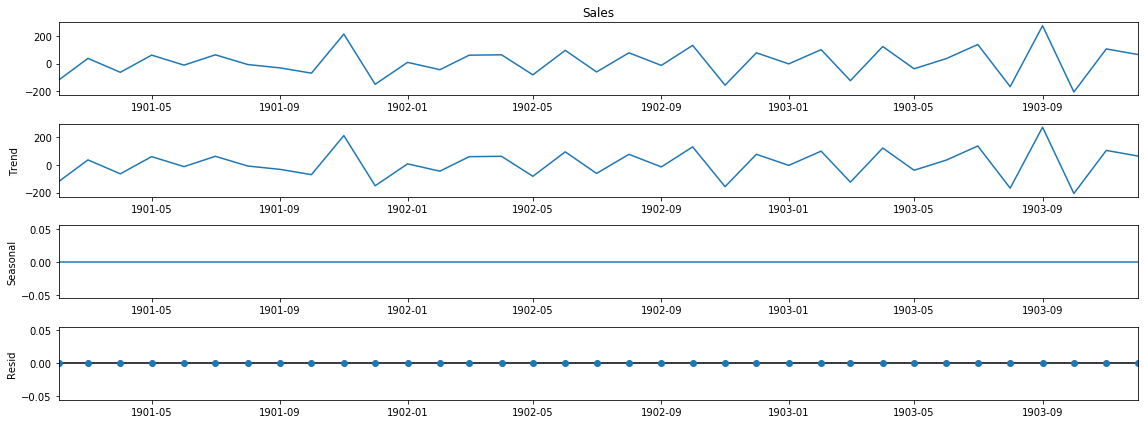

In [198]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(difr_1_NoNA, model = 'additive', period = 1)
decomposition.plot()

---

#### PERFORM ADFULLER TEST - (To check Time-Series has STATIONARITY)

In [168]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(difr_1_NoNA, autolag = 'AIC')

print("1. ADF: ", dftest[0])
print("2. P-Value: ", dftest[1])
print("3. Num. of Lags: ", dftest[2])
print("4. Num. of Observations used for ADF Regression and Critical Values Calculations: ", dftest[3])
print("5. Critical Values: ", dftest[4])
if dftest[1] > 0.05:
    print('TIME-SERIES is NOT STATIONARY')
else:
    print('TIME-SERIES is STATIONARY')

1. ADF:  -7.249074055553854
2. P-Value:  1.7998574141687034e-10
3. Num. of Lags:  1
4. Num. of Observations used for ADF Regression and Critical Values Calculations:  33
5. Critical Values:  {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}
TIME-SERIES is STATIONARY


---

#### PERCENTAGE CHANGE IN TIME-SERIES VALUES

In [171]:
diff = difr_1_NoNA

In [174]:
diff_PercentageChange = diff.pct_change()

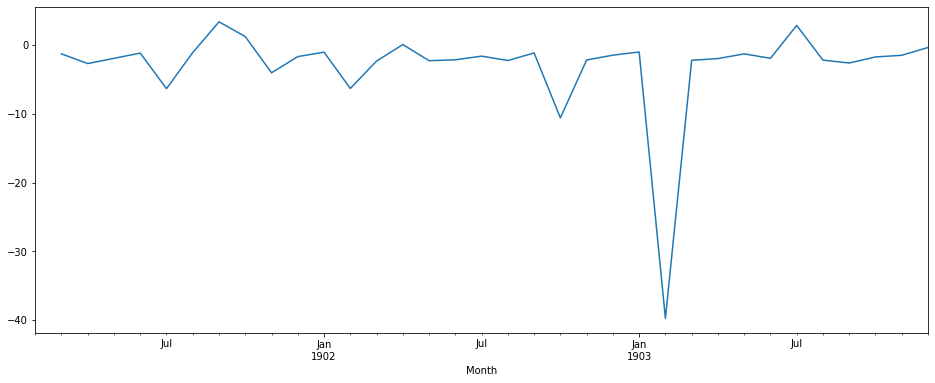

In [175]:
diff_PercentageChange.plot()
plt.show()

---

## FUNCTION - MANUAL DIFFERENCING

#### FUNCTION CREATION

In [218]:
from matplotlib import pyplot

def difference(series, interval = 1):
    diff = list()
    for i in range(interval, len(series)):
        value = series[i] - series[i - interval]
        diff.append(value)
    return diff
 
# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob
 
# define a dataset with a linear trend
data = series
#print(data)

#### DIFFERENCING FOR TREND

        0
0  -120.1
1    37.2
2   -63.8
3    61.0
4   -11.8
5    63.3
6    -7.3
7   -31.7
8   -69.9
9   213.6
10 -150.6
11    8.4
12  -44.8
13   60.6
14   63.2
15  -81.9
16   95.6
17  -61.0
18   77.6
19  -13.7
20  131.7
21 -157.1
22   77.8
23   -2.6
24  100.7
25 -124.5
26  123.4
27  -38.0
28   36.1
29  138.1
30 -167.9
31  274.4
32 -206.7
33  106.0
34   65.6


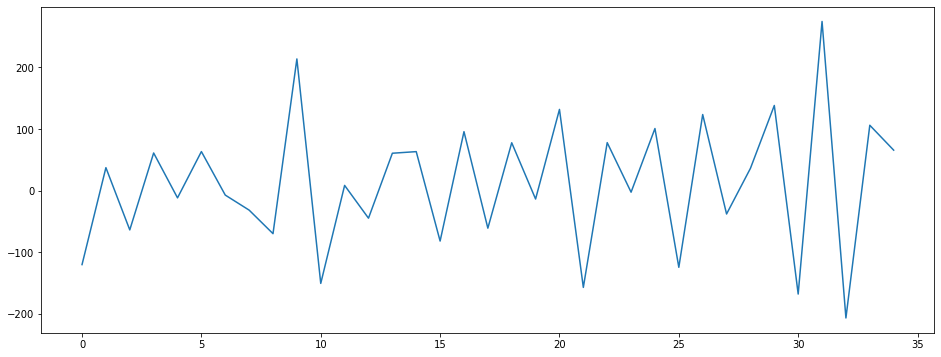

In [222]:
diff = difference(data)
print(pd.DataFrame(diff))
pyplot.plot(diff)
pyplot.show()

#### PERFORM ADFULLER TEST ON < FIRST DIFFERENCE > SERIES

In [232]:
from statsmodels.tsa.stattools import adfuller

differ_1 = adfuller(diff, autolag = 'AIC')

print("1. ADF: ", differ_1[0])
print("2. P-Value: ", differ_1[1])
print("3. Num. of Lags: ", differ_1[2])
print("4. Num. of Observations used for ADF Regression and Critical Values Calculations: ", differ_1[3])
print("5. Critical Values: ", differ_1[4])
if differ_1[1] > 0.05:
    print('TIME-SERIES is NOT STATIONARY')
else:
    print('TIME-SERIES is STATIONARY')

1. ADF:  -7.249074055553854
2. P-Value:  1.7998574141687034e-10
3. Num. of Lags:  1
4. Num. of Observations used for ADF Regression and Critical Values Calculations:  33
5. Critical Values:  {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}
TIME-SERIES is STATIONARY


#### INVERTING THE DIFFERENCE

[145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8, 122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287.0, 226.0, 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6, 682.0, 475.3, 581.3, 646.9]


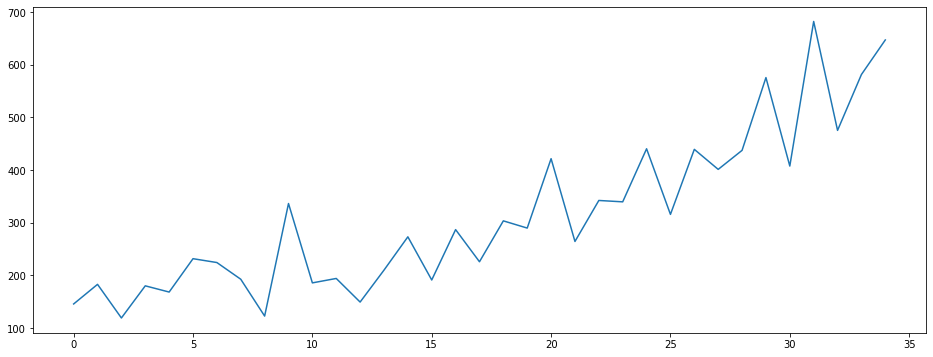

In [221]:
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
print(inverted)
pyplot.plot(inverted)
pyplot.show()

---

#### SEASONALITY DIFFERENCING

Seasonality Time steps need to be mentioned as required in place of '3' in first line of code.

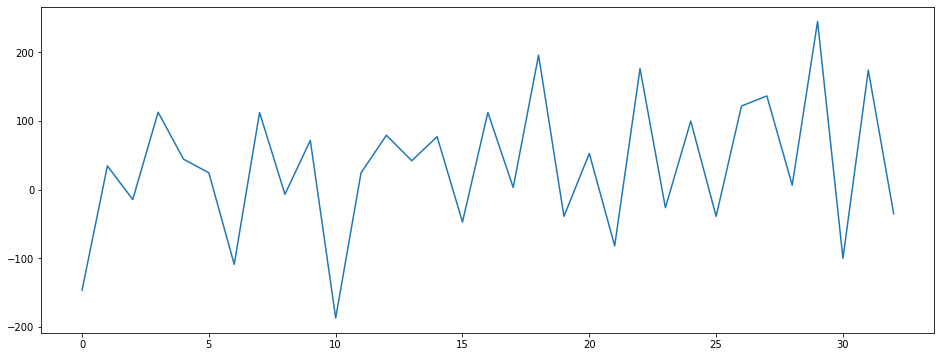

In [238]:
diff_sesn_3 = difference(data, 3)
#print(pd.DataFrame(diff_sesn_3))
pyplot.plot(diff_sesn_3)
pyplot.show()

#### PERFORM ADFULLER TEST ON < SEASONAL DIFFERENCE > SERIES

In [239]:
from statsmodels.tsa.stattools import adfuller

differ_1_seas_3 = adfuller(diff_sesn_3, autolag = 'AIC')

print("1. ADF: ", differ_1_seas_3[0])
print("2. P-Value: ", differ_1_seas_3[1])
print("3. Num. of Lags: ", differ_1_seas_3[2])
print("4. Num. of Observations used for ADF Regression and Critical Values Calculations: ", differ_1_seas_3[3])
print("5. Critical Values: ", differ_1_seas_3[4])
if differ_1_seas_3[1] > 0.05:
    print('TIME-SERIES is NOT STATIONARY')
else:
    print('TIME-SERIES is STATIONARY')

1. ADF:  -0.7104912008681828
2. P-Value:  0.844013333086435
3. Num. of Lags:  10
4. Num. of Observations used for ADF Regression and Critical Values Calculations:  22
5. Critical Values:  {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
TIME-SERIES is NOT STATIONARY


#### As seen with with seasonality time step 3 we didn't received STATIONARITY. So we will reduce it to 1.

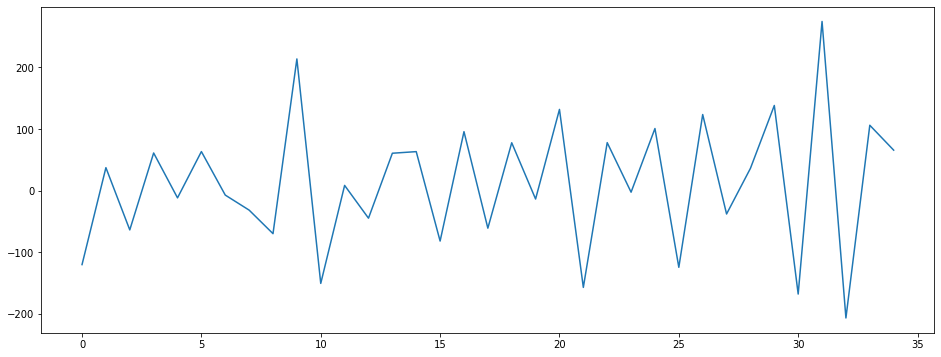

In [240]:
diff_sesn_1 = difference(data, 1)
#print(pd.DataFrame(diff_sesn_3))
pyplot.plot(diff_sesn_1)
pyplot.show()

#### With SEASONALITY Time Step 1, we had acheived Stationarity.

In [242]:
from statsmodels.tsa.stattools import adfuller

differ_1_seas_1 = adfuller(diff_sesn_1, autolag = 'AIC')

print("1. ADF: ", differ_1_seas_1[0])
print("2. P-Value: ", differ_1_seas_1[1])
print("3. Num. of Lags: ", differ_1_seas_1[2])
print("4. Num. of Observations used for ADF Regression and Critical Values Calculations: ", differ_1_seas_1[3])
print("5. Critical Values: ", differ_1_seas_1[4])
if differ_1_seas_1[1] > 0.05:
    print('TIME-SERIES is NOT STATIONARY')
else:
    print('TIME-SERIES is STATIONARY')

1. ADF:  -7.249074055553854
2. P-Value:  1.7998574141687034e-10
3. Num. of Lags:  1
4. Num. of Observations used for ADF Regression and Critical Values Calculations:  33
5. Critical Values:  {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}
TIME-SERIES is STATIONARY


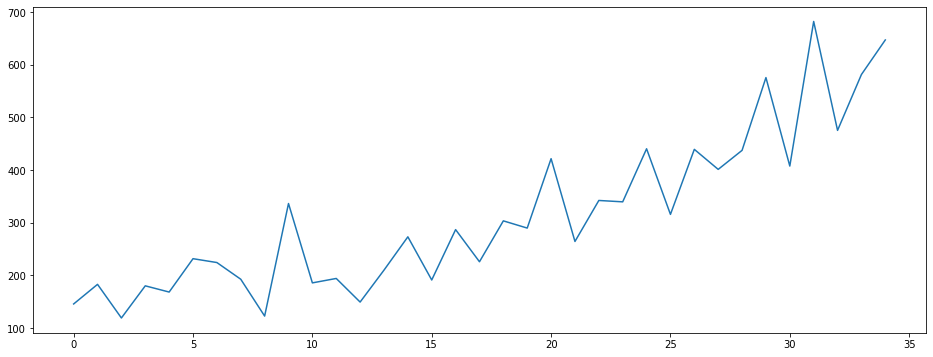

In [224]:
# invert the difference
inverted_sesn = [inverse_difference(data[i], diff_sesn[i]) for i in range(len(diff_sesn))]
pyplot.plot(inverted_sesn)
pyplot.show()

---

## AUTOMATIC DIFFERENCING 

with .diff()

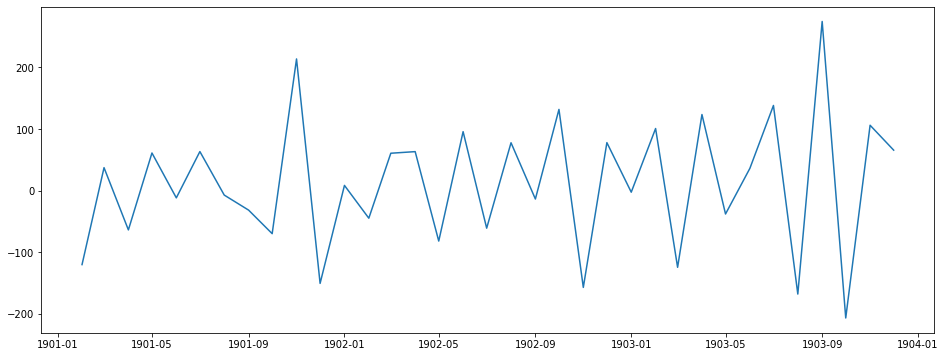

In [243]:
diffr_auto = series.diff()
pyplot.plot(diff_auto)
pyplot.show()

###### Convert to DataFrame to drop Nan Values

In [246]:
differAuto_df = pd.DataFrame(diffr_auto)
differAuto_df.head()

,Sales
Month,
1901-01-01,NaN
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0


###### DROP NaN Values

In [253]:
differAuto_df = differAuto_df.dropna()
differAuto_df.isna().sum()

#### PERFORM ADFULLER TEST TO CHECK STATIONARITY

In [255]:
from statsmodels.tsa.stattools import adfuller

differAuto = adfuller(differAuto_df, autolag = 'AIC')

print("1. ADF: ", differAuto[0])
print("2. P-Value: ", differAuto[1])
print("3. Num. of Lags: ", differAuto[2])
print("4. Num. of Observations used for ADF Regression and Critical Values Calculations: ", differAuto[3])
print("5. Critical Values: ", differAuto[4])
if differAuto[1] > 0.05:
    print('TIME-SERIES is NOT STATIONARY')
else:
    print('TIME-SERIES is STATIONARY')

1. ADF:  -7.249074055553854
2. P-Value:  1.7998574141687034e-10
3. Num. of Lags:  1
4. Num. of Observations used for ADF Regression and Critical Values Calculations:  33
5. Critical Values:  {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}
TIME-SERIES is STATIONARY
